In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [3]:
dfsalaries = pd.read_csv('T Salary Survey EU 2019.csv', sep=',')
dfsalaries


,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Yearly bonus,...,Yearly stocks one year ago. Only answer if staying in same country,Number of vacation days,Number of home office days per month,Main language at work,Company name,Company size,Company type,Сontract duration,Company business sector,0
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,1000.0,...,NaN,29.0,4.0,English,NaN,50-100,Startup,unlimited,Tourism,NaN
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,...,NaN,22.0,4.0,English,NaN,10-50,Product,unlimited,Scientific Activities,NaN
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,...,NaN,27.0,NaN,English,NaN,1000+,Startup,unlimited,NaN,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,NaN,...,NaN,24.0,NaN,English,Auto1,100-1000,Product,unlimited,Transport,NaN
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,NaN,...,NaN,30.0,0.0,English,Luxoft,50-100,Product,unlimited,Automotive,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,07.01.2020 09:23:01,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,3000.0,...,0.0,25.0,5.0,English,NaN,1000+,Product,unlimited,Telecom,NaN
986,07.01.2020 10:08:18,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,0.0,...,0.0,27.0,5.0,English,ING,1000+,Bank,unlimited,Finance / Insurance,NaN
987,07.01.2020 16:52:43,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,10000.0,...,NaN,30.0,5.0,English,SAP,1000+,Product,unlimited,Сommerce,NaN
988,08.01.2020 11:18:41,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,3000.0,...,NaN,26.0,6.0,English,NaN,1000+,Product,more than 1 year,Health,NaN


In [4]:
dfsalaries = dfsalaries.drop(columns = ['Yearly bonus','Yearly stocks','Yearly brutto salary (without bonus and stocks) one year ago. Only answer if staying in same country','Yearly bonus one year ago. Only answer if staying in same country','Yearly stocks one year ago. Only answer if staying in same country','Number of vacation days','Number of home office days per month','Main language at work','Сontract duration','0'])

dfsalaries

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Company name,Company size,Company type,Company business sector
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,NaN,50-100,Startup,Tourism
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,10-50,Product,Scientific Activities
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,1000+,Startup,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,Auto1,100-1000,Product,Transport
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,Luxoft,50-100,Product,Automotive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,07.01.2020 09:23:01,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,NaN,1000+,Product,Telecom
986,07.01.2020 10:08:18,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,ING,1000+,Bank,Finance / Insurance
987,07.01.2020 16:52:43,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,SAP,1000+,Product,Сommerce
988,08.01.2020 11:18:41,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,NaN,1000+,Product,Health


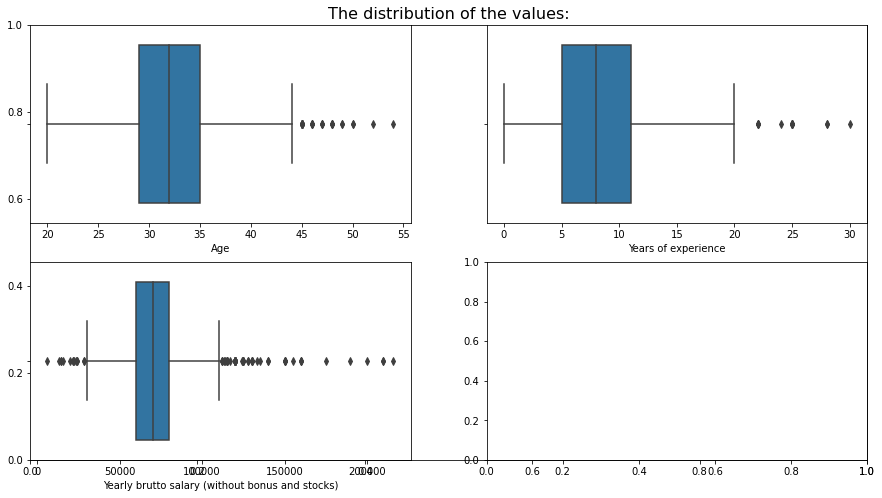

In [5]:
fig = plt.figure(figsize= (15, 8))
plt.title('The distribution of the values:', fontsize= 16)
axs = fig.subplots(nrows=2, ncols= 2)
sns.boxplot(data = dfsalaries, x= 'Age', ax = axs[0,0])
sns.boxplot(data = dfsalaries, x= 'Years of experience',ax = axs[0,1])
sns.boxplot(data = dfsalaries, x= 'Yearly brutto salary (without bonus and stocks)',ax = axs[1,0])
plt.show()

In [6]:
def outliers(dataframe, column):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_boundary = Q1 - 1.5 * IQR
    upper_boundary = Q3 + 1.5 * IQR
    df_new = dataframe.loc[(dataframe[column] >= lower_boundary) & (dataframe[column] <= upper_boundary)]
    return df_new

In [7]:
age = outliers(dfsalaries, 'Age')
experience = outliers(dfsalaries, 'Years of experience')
salary = outliers(dfsalaries, 'Yearly brutto salary (without bonus and stocks)')
print(salary)

             Zeitstempel   Age Gender       City Seniority level  \
0    02.12.2019 11:18:26  33.0   Male     Berlin          Senior   
1    02.12.2019 11:18:35  29.0   Male     Berlin          Middle   
2    02.12.2019 11:18:56   NaN   Male     Berlin          Middle   
3    02.12.2019 11:19:08  30.0   Male     Berlin          Senior   
4    02.12.2019 11:19:37  32.0   Male     Berlin          Senior   
..                   ...   ...    ...        ...             ...   
985  07.01.2020 09:23:01  30.0   Male  Amsterdam          Senior   
986  07.01.2020 10:08:18  28.0   Male  Amsterdam          Senior   
987  07.01.2020 16:52:43  42.0   Male     Munich          Senior   
988  08.01.2020 11:18:41  33.0   Male     Berlin          Senior   
989  08.01.2020 22:20:08  32.0   Male  Frankfurt          Middle   

    Position (without seniority)  Years of experience  \
0            Fullstack Developer                   13   
1              Backend Developer                    3   
2           

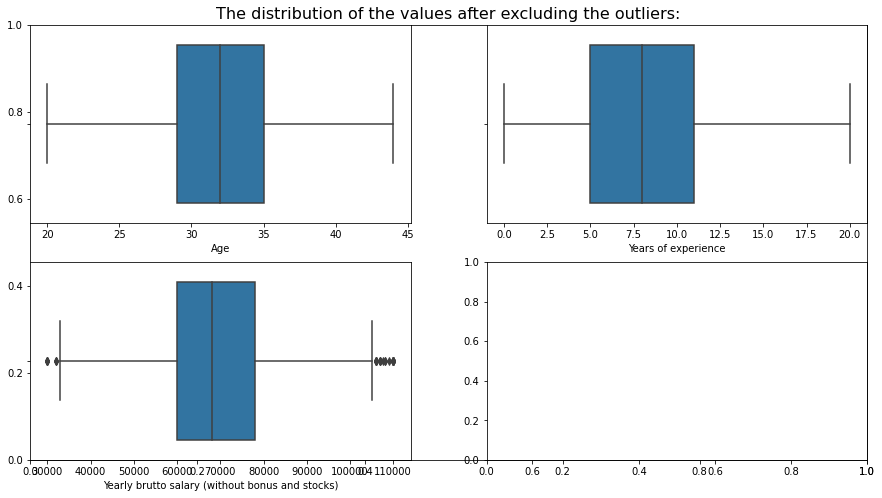

In [63]:

fig = plt.figure(figsize= (15, 8))
plt.title('The distribution of the values after excluding the outliers:', fontsize= 16)
axs = fig.subplots(nrows=2, ncols= 2)
sns.boxplot(data = age, x= 'Age', ax = axs[0,0])
sns.boxplot(data = experience, x= 'Years of experience',ax = axs[0,1])
sns.boxplot(data = salary, x= 'Yearly brutto salary (without bonus and stocks)',ax = axs[1,0])
plt.show()

10


/tmp/ipykernel_24444/3189074331.py:25: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, color='grey',


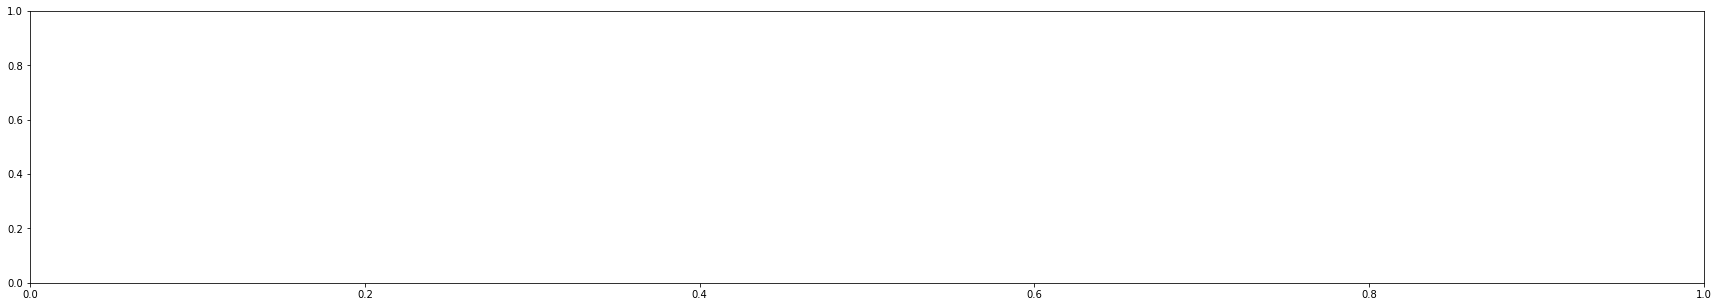

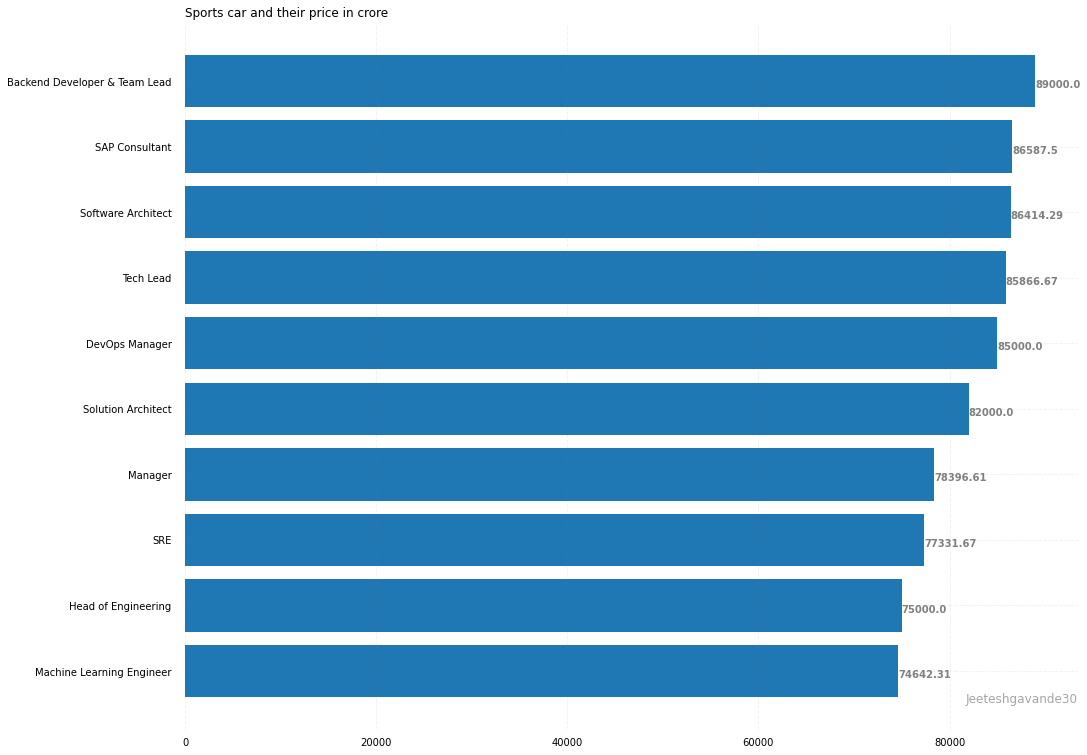

In [8]:
# salary_income = dfsalaries.groupby('Position').mean()
figure, axis = plt.subplots(1,1)
figure.set_figheight(5)
figure.set_figwidth(30)
graph1_value = salary.groupby(
    'Position (without seniority)')['Yearly brutto salary (without bonus and stocks)'].mean().sort_values(ascending=False).head(10)
print(len(graph1_value))
# print(graph1_value.values)


fig, ax = plt.subplots(figsize=(16, 13))
ax.barh(graph1_value.index, graph1_value.values)
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

# Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')

# Add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10)

# Add x, y gridlines
ax.grid(b=True, color='grey',
        linestyle='-.', linewidth=0.5,
        alpha=0.2)

# Show top values
ax.invert_yaxis()

# Add annotation to bars
for i in ax.patches:
    plt.text(i.get_width()+0.2, i.get_y()+0.5,
             str(round((i.get_width()), 2)),
             fontsize=10, fontweight='bold',
             color='grey')

# Add Plot Title
ax.set_title('Sports car and their price in crore',
             loc='left', )

# Add Text watermark
fig.text(0.9, 0.15, 'Jeeteshgavande30', fontsize=12,
         color='grey', ha='right', va='bottom',
         alpha=0.7)

# Show Plot
plt.show()


([<matplotlib.patches.Wedge at 0x7f3a7ed3d750>,
 [Text(0.7634816078457252, 0.7918938277833125, 'Backend Developer'),
  Text(-0.45261803361025454, 1.0025651677825171, 'Data Scientist'),
  Text(-0.9592543436832603, 0.5383596419911114, 'Fullstack Developer'),
  Text(-1.0987515517049742, 0.052393011231571564, 'Frontend Developer'),
  Text(-1.0261643165335754, -0.3962155921631306, 'Manager'),
  Text(-0.8074878982107808, -0.7469694064974387, 'QA'),
  Text(-0.506071567346796, -0.9766737268520934, 'DevOps'),
  Text(-0.17914913401595273, -1.0853135896050203, 'Mobile Developer'),
  Text(0.7709932493967643, -0.784582315238254, 'Other')],
 [Text(0.4164445133703955, 0.43194208788180677, '25.6%'),
  Text(-0.24688256378741155, 0.5468537278813729, '12.3%'),
  Text(-0.523229642009051, 0.29365071381333346, '7.9%'),
  Text(-0.5993190282027131, 0.02857800612631176, '6.9%'),
  Text(-0.5597259908364957, -0.21611759572534395, '6.4%'),
  Text(-0.4404479444786077, -0.407437858089512, '5.7%'),
  Text(-0.2760390

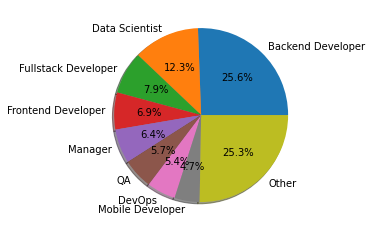

In [88]:
employ_position =  dfsalaries.groupby(
    'Position (without seniority)')['Zeitstempel'].count().sort_values(ascending=False)
# employ_position
small_count = 0
for i in range(8,len(employ_position)):
    small_count += employ_position.values[i]


employ_data =[]
employ_label =[]
for i in range (0,8):
    employ_data.append(employ_position.values[i])
    employ_label.append(employ_position.index[i])
employ_data.append(small_count)
employ_label.append('Other')
# employ_data.append(employ_position.head(5).values)
# employ_label.append(employ_position.head(5).index)
# employ_data.append(2)
# type(employ_position.values[0])
# # male_count = dfsalaries.loc[dfsalaries["Gender"] =='Male']['Gender'].count()
# # female_count = dfsalaries.loc[(dfsalaries["Gender"] =='Female') ]['Gender'].count()
# # gender_label =['Male' , 'Female']
# # gender_data=[male_count,female_count]
plt.pie(employ_data, labels = employ_label  ,autopct='%1.1f%%' , shadow=True)

([<matplotlib.patches.Wedge at 0x7f6bf7684f70>,
 [Text(-0.9658999839015046, 0.5263432540643734, 'Male'),
  Text(1.1415181045529044, -0.6220421344072642, 'Female')],
 [Text(-0.5268545366735479, 0.2870963203987491, '84.1%'),
  Text(0.7024726797248642, -0.38279515963523947, '15.9%')])

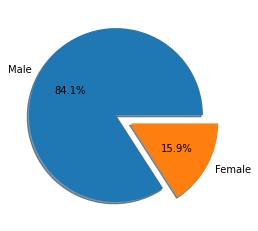

In [79]:
male_count = salary.loc[salary["Gender"] =='Male']['Gender'].count()
female_count = salary.loc[(salary["Gender"] =='Female') ]['Gender'].count()
gender_label =['Male' , 'Female']
gender_data=[male_count,female_count]
plt.pie(gender_data, labels = gender_label ,explode=[0,0.2] ,autopct='%1.1f%%' , shadow=True)

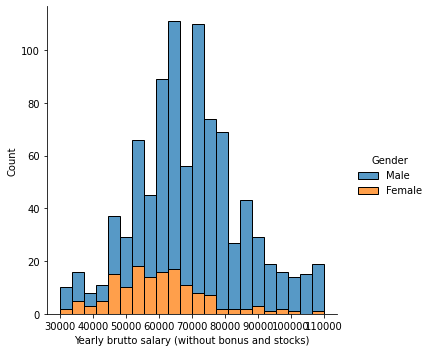

In [80]:
sns.displot(data=salary, x="Yearly brutto salary (without bonus and stocks)", hue="Gender", multiple="stack")

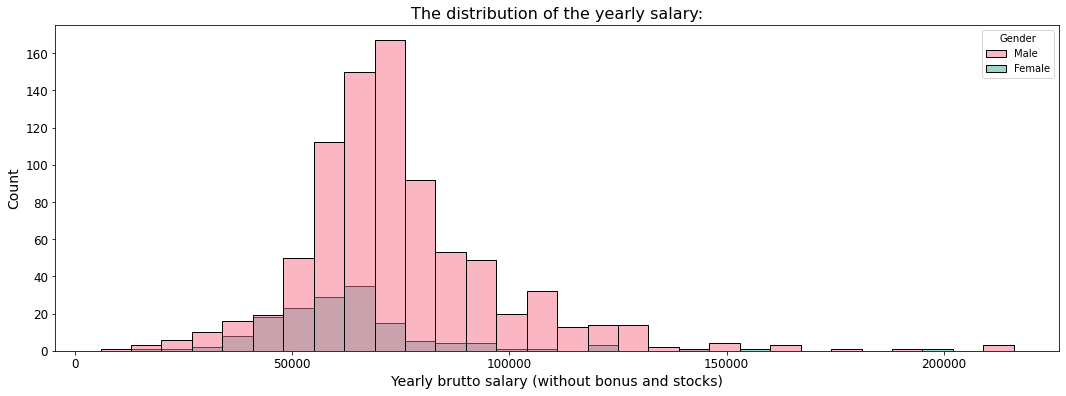

In [82]:
# (Khong sai)
plt.figure(figsize=(18,6))
sns.histplot(data= dfsalaries, x= 'Yearly brutto salary (without bonus and stocks)', hue= 'Gender', palette= 'husl', kde= False, bins = 30)
plt.title('The distribution of the yearly salary:',fontsize= 16)
plt.xlabel('Yearly brutto salary (without bonus and stocks)', fontsize= 14)
plt.ylabel('Count', fontsize= 14)
plt.xticks(fontsize= 12)
plt.yticks(fontsize = 12)
plt.show()

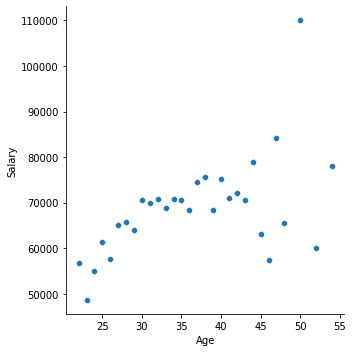

In [65]:
# tips = sns.load_dataset("tips")
# g = sns.relplot(data=tips, x="total_bill", y="tip")
# g.ax.axline(xy1=(10, 2), slope=.2, color="b", dashes=(5, 2))
months = pd.unique(salary['Age'])
graph2_value = salary.groupby(
    'Age')['Yearly brutto salary (without bonus and stocks)'].mean().sort_values(ascending=True)
# print(graph2_value.item)
# plt.scatter(graph2_value.index, graph2_value.values)
# plt.show()
# axes=fig.add_axes([0,0,2,2]) 

tips = graph2_value.to_frame(name = 'Salary').reset_index()
# print(x)
start_ax = tips['Age'][0]
start_ay =  tips['Salary'][0]

g = sns.relplot(data=tips, x="Age", y="Salary")
# g.ax.axline(xy1=(start_ax ,start_ay),slope=, color="b", dashes=(5, 2))
# print(tips['Age'][0])
# print(tips['Salary'][0])

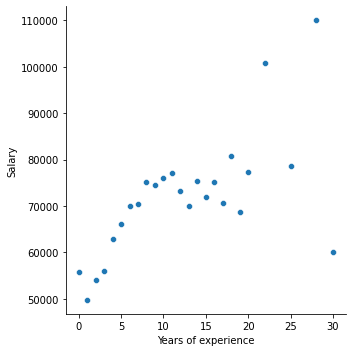

In [81]:
graph2_value = salary.groupby(
    'Years of experience')['Yearly brutto salary (without bonus and stocks)'].mean().sort_index()
# print(graph2_value)
# print(graph2_value.item)
# plt.scatter(graph2_value.index, graph2_value.values)
# plt.show()
# axes=fig.add_axes([0,0,2,2]) 

tips = graph2_value.to_frame(name = 'Salary').reset_index()
# print(x)
start_ax = tips['Years of experience'][0]
start_ay =  tips['Salary'][0]

g = sns.relplot(data=tips, x="Years of experience", y="Salary")
# g.ax.axline(xy1=(start_ax ,start_ay),slope=, color="b", dashes=(5, 2))
# print(tips['Age'][0])
# print(tips['Salary'][0])

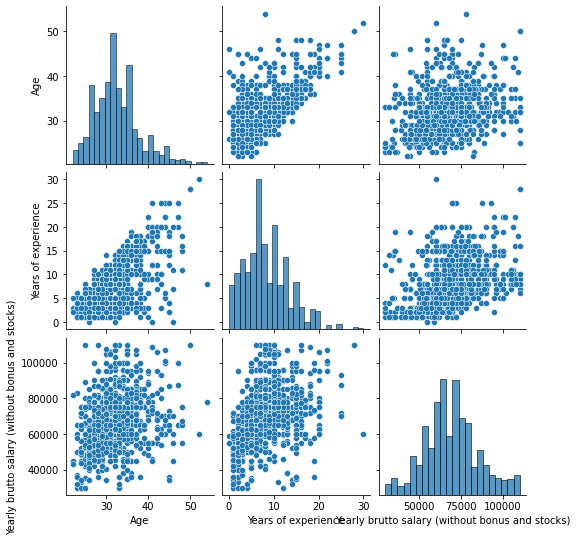

In [86]:
# (Khong Hay)
age_exp_sal = salary[['Age','Years of experience','Yearly brutto salary (without bonus and stocks)']]
sns.pairplot(age_exp_sal)

In [102]:
# months = pd.unique(salary[salary['Company size'].notnull()])
uhm =salary.dropna(subset=['Company size'])
uhm
months =pd.unique(uhm['Company size'])
months

array(['50-100', '10-50', '1000+', '100-1000', 'up to 10'], dtype=object)

<AxesSubplot:xlabel='Years of experience', ylabel='Yearly brutto salary (without bonus and stocks)'>

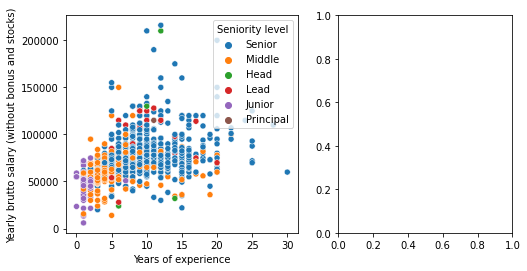

In [42]:
#moi quan he giau year expe , position , salary + bieu do phu la position no co bao nhieu nguoi lam
graph3_value = dfsalaries[['Seniority level','Years of experience','Yearly brutto salary (without bonus and stocks)']]
# graph4_value = dfsalaries[['Seniority level','']]
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=graph3_value, x="Years of experience", y="Yearly brutto salary (without bonus and stocks)", hue="Seniority level", ax=axs[0])
# sns.histplot(data=penguins, x="Seniority level", hue="Seniority level", shrink=.8, alpha=.8, legend=False, ax=axs[1])
# f.tight_layout()

In [6]:

senority = pd.unique(dfsalaries['Seniority level'])
senority

array(['Senior', 'Middle', 'Head', 'Lead', nan, 'Junior', 'Principal'],
      dtype=object)

In [9]:
company_type = pd.unique(dfsalaries['Company type'])
company_type

array(['Startup', 'Product', nan, 'Consulting / Agency',
       'Bodyshop / Outsource', 'University', 'Bank', 'Outsource'],
      dtype=object)

<AxesSubplot:xlabel='Your main technology / programming language'>

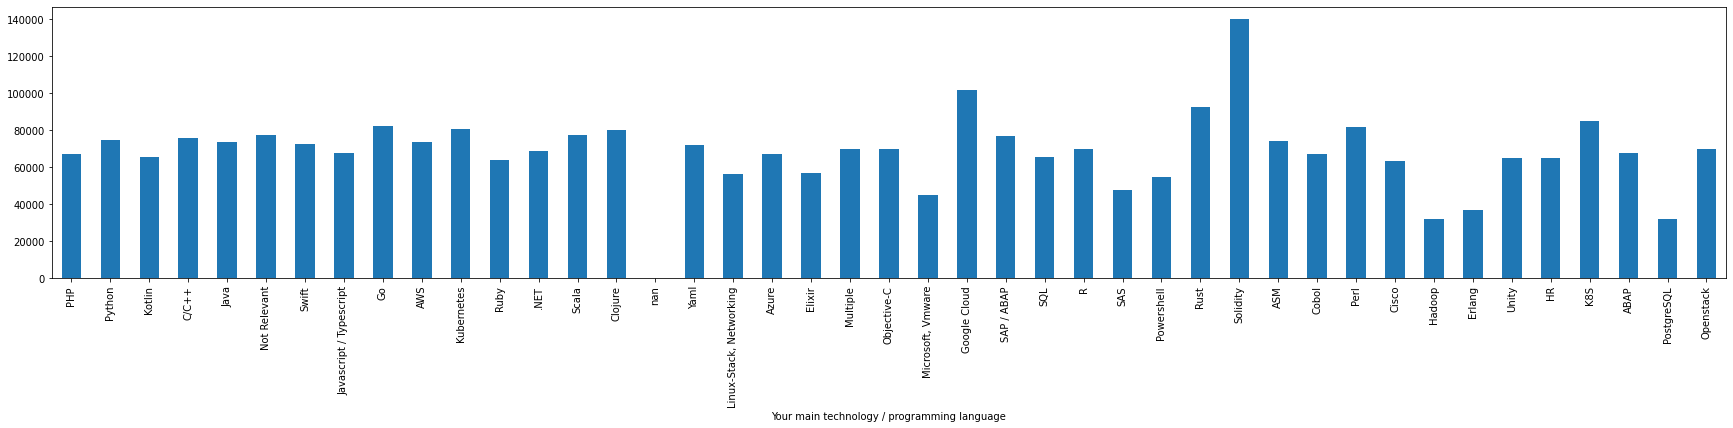

In [38]:
figure, axis = plt.subplots(1, 1)
figure.set_figheight(5)
figure.set_figwidth(30)
months = pd.unique(dfsalaries['Your main technology / programming language'])
dfsalaries.groupby(
    'Your main technology / programming language')['Yearly brutto salary (without bonus and stocks)'].mean().reindex(months).plot(kind='bar')


In [12]:
emploee_city = salary.groupby(
    'City')['Yearly brutto salary (without bonus and stocks)'].count().sort_values(ascending = False)
emploee_city.index[0:5].tolist()



['Berlin', 'Munich', 'Amsterdam', 'Frankfurt', 'Hamburg']

In [13]:
test = emploee_city.to_frame(name='total').reset_index()
# em_city_out = outliers(test, 'Count')
test.head(20)

,City,total
0,Berlin,411
1,Munich,210
2,Amsterdam,79
3,Frankfurt,47
4,Hamburg,33
5,Cologne,16
6,Stuttgart,14
7,Düsseldorf,10
8,Moscow,8
9,Nuremberg,6


In [14]:
city_comsize = salary.loc[(salary['City'].isin(emploee_city.index[0:5].tolist()))]
city_comsize
# g = sns.relplot(data=city_comsize, x="Years of experience", y="Salary")

,Zeitstempel,Age,Gender,City,Seniority level,Position (without seniority),Years of experience,Your main technology / programming language,Yearly brutto salary (without bonus and stocks),Company name,Company size,Company type,Company business sector
0,02.12.2019 11:18:26,33.0,Male,Berlin,Senior,Fullstack Developer,13,PHP,64000.0,NaN,50-100,Startup,Tourism
1,02.12.2019 11:18:35,29.0,Male,Berlin,Middle,Backend Developer,3,Python,55000.0,NaN,10-50,Product,Scientific Activities
2,02.12.2019 11:18:56,NaN,Male,Berlin,Middle,Mobile Developer,4,Kotlin,70000.0,NaN,1000+,Startup,NaN
3,02.12.2019 11:19:08,30.0,Male,Berlin,Senior,Backend Developer,6,PHP,63000.0,Auto1,100-1000,Product,Transport
4,02.12.2019 11:19:37,32.0,Male,Berlin,Senior,Embedded Developer,10,C/C++,66000.0,Luxoft,50-100,Product,Automotive
...,...,...,...,...,...,...,...,...,...,...,...,...,...
985,07.01.2020 09:23:01,30.0,Male,Amsterdam,Senior,Backend Developer,10,Python,71000.0,NaN,1000+,Product,Telecom
986,07.01.2020 10:08:18,28.0,Male,Amsterdam,Senior,Security Engineer,7,Not Relevant,72000.0,ING,1000+,Bank,Finance / Insurance
987,07.01.2020 16:52:43,42.0,Male,Munich,Senior,Manager,9,Not Relevant,68000.0,SAP,1000+,Product,Сommerce
988,08.01.2020 11:18:41,33.0,Male,Berlin,Senior,Software Architect,15,Javascript / Typescript,100000.0,NaN,1000+,Product,Health


<AxesSubplot:xlabel='Company size', ylabel='Yearly brutto salary (without bonus and stocks)'>

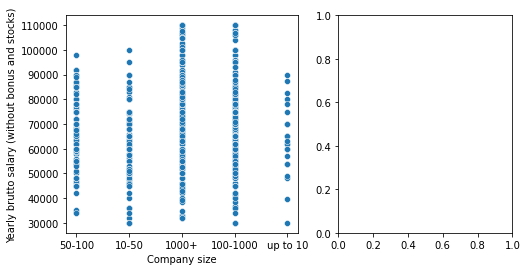

In [23]:
group_salarysize = salary.groupby(
    'Company size')['Yearly brutto salary (without bonus and stocks)'].mean().sort_index()
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=salary, x="Company size", y="Yearly brutto salary (without bonus and stocks)", ax=axs[0])

<AxesSubplot:xlabel='City'>

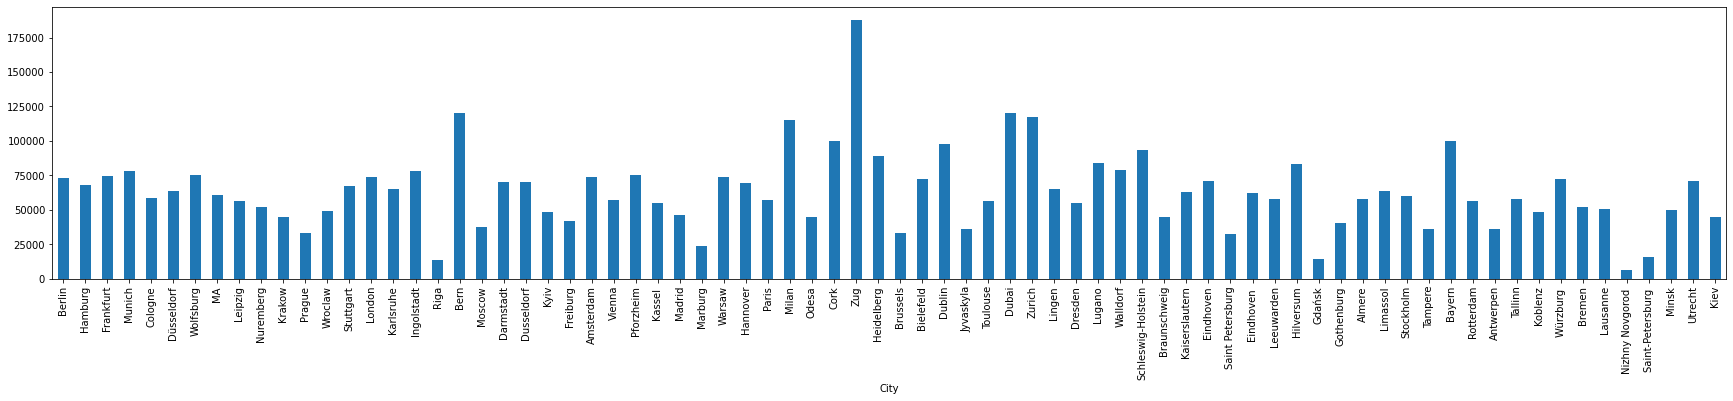

In [27]:
figure, axis = plt.subplots(1, 1)
figure.set_figheight(5)
figure.set_figwidth(30)
months = pd.unique(dfsalaries['City'])
dfsalaries.groupby(
    'City')['Yearly brutto salary (without bonus and stocks)'].mean().reindex(months).plot(kind='bar')

In [60]:

months = pd.unique(dfsalaries['Age']).astype(float)
months.sort(axis=0)
months


array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30., 31., 32.,
       33., 34., 35., 36., 37., 38., 39., 40., 41., 42., 43., 44., 45.,
       46., 47., 48., 49., 50., 52., 54., nan])

In [71]:
lessthan24 = dfsalaries.loc[dfsalaries["Age"] <=24]['Age'].count()
from25to29 = dfsalaries.loc[(dfsalaries["Age"] >= 25) & dfsalaries["Age"] <=29]['Age'].count()
from30to39 = dfsalaries.loc[(dfsalaries["Age"] >= 30)
                            & dfsalaries["Age"] <= 39]['Age'].count()
from40to49 = dfsalaries.loc[(dfsalaries["Age"] >= 40)
                            & dfsalaries["Age"] <= 49]['Age'].count()
from50 = dfsalaries.loc[(dfsalaries["Age"] >= 50)]['Age'].count()
data = [lessthan24 , from25to29 , from30to39 , from40to49 , from50 ]
labels = []
plt.pie(data, labels=cars)
